In [0]:
# Importing Required Libraries

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
# Loading Dataset

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
# Define a dynamic plot function

def dynamic_plot(x,y,y_1,ax,ticks,title,colors=["b"]):
  ax.plot(x,y,"b",label="Train Loss")
  ax.plot(x,y_1,"r",label="Test Loss")
  if len(x) == 1:
    plt.legend()
    plt.title(title)
  plt.yticks(ticks)
  fig.canvas.draw()

# Model 1: Architecture 2 Hidden Layes without Dropout and Batch Normalization

In [0]:
n_x = 784 # number of input features
n_1 = 224 # number of hidden units in Layer 1
n_2 = 128 # number of hidden units in Layer 2
n_y = 10 # number of hidden units in Output Layer as we have 10 class labels to predict

In [0]:
# Create Placeholder for both x and y

x = tf.placeholder(tf.float32,[None,784],name="x")
y = tf.placeholder(tf.float32,[None,10],name="y")

In [0]:
# Parameters Initialization
# Create dictionary for convinience

# We are using Relu activation for our hidden layers and in the output layer use sigmoid activation function

weights = {
    "h1":tf.Variable(tf.random_normal([n_x,n_1],stddev=0.0504, mean=0)),
    "h2":tf.Variable(tf.random_normal([n_1,n_2],stddev=0.0942, mean=0)),
    "o":tf.Variable(tf.random_normal([n_2,n_y],stddev=0.124, mean=0))
}

biases = {
    "b1":tf.Variable(tf.random_normal([n_1])),
    "b2":tf.Variable(tf.random_normal([n_2])),
    "o":tf.Variable(tf.random_normal([n_y]))
}

In [0]:
# Forward Propagation Step

def forward_pass(x,weights,biases):
  
  layer_1 = tf.add(tf.matmul(x,weights["h1"]),biases["b1"])
  layer_1 = tf.nn.relu(layer_1)
  
  layer_2 = tf.add(tf.matmul(layer_1,weights["h2"]),biases["b2"])
  layer_2 = tf.nn.relu(layer_2)
  
  output_layer = tf.add(tf.matmul(layer_2,weights["o"]),biases["o"])
  output_layer = tf.nn.sigmoid(output_layer)
  
  return output_layer

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Epoch: 0001 train cost=1.584607731 test cost=1.578509159
Epoch: 0002 train cost=1.509029021 test cost=1.508369493
Epoch: 0003 train cost=1.495777911 test cost=1.496758994
Epoch: 0004 train cost=1.488526941 test cost=1.491468804
Epoch: 0005 train cost=1.483416099 test cost=1.488111329
Epoch: 0006 train cost=1.479839036 test cost=1.486208113
Epoch: 0007 train cost=1.477015649 test cost=1.484140646
Epoch: 0008 train cost=1.474854422 test cost=1.483235443
Epoch: 0009 train cost=1.473096743 test cost=1.482519221
Epoch: 0010 train cost=1.471627671 test cost=1.481869944
Accuracy: 0.9775


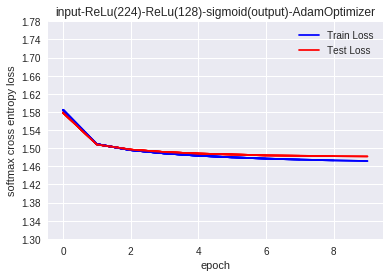

In [8]:
# Building Our Model

training_epochs = 10
learning_rate = 0.001
batch_size = 100
display_step = 1

y_hat = forward_pass(x,weights,biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_hat, labels = y)) # Cost function defined as this is a multiclass problem

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) # Using Adam Optimizer for better result

with tf.Session() as sess: # Create a tensorflow session
  tf.global_variables_initializer().run()
  
  fig,ax = plt.subplots(1,1)
  ax.set_xlabel("epoch")
  ax.set_ylabel("softmax cross entropy loss")
  
  xs_1,ytrs_1,ytes_1 = [],[],[]
  
  for epoch in range(training_epochs):
    
    train_avg_cost = 0
    test_avg_cost = 0
    
    total_num_batches = int(math.floor(mnist.train.num_examples/batch_size))
    
    for i in range(total_num_batches):
      
      batch_X,batch_Y = mnist.train.next_batch(batch_size)
      
      _,c,w = sess.run([optimizer,cost,weights],feed_dict={x:batch_X,y:batch_Y})
      train_avg_cost += c / total_num_batches
      
      c = sess.run(cost,feed_dict={x:mnist.test.images,y:mnist.test.labels})
      test_avg_cost += c / total_num_batches
      
    xs_1.append(epoch)
    ytrs_1.append(train_avg_cost)
    ytes_1.append(test_avg_cost)
    
    dynamic_plot(xs_1,ytrs_1,ytes_1,ax,np.arange(1.3,1.8,step=0.04),"input-ReLu(224)-ReLu(128)-sigmoid(output)-AdamOptimizer")
    
    if epoch%display_step == 0:
      print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
      
  
  dynamic_plot(xs_1,ytrs_1,ytes_1,ax,np.arange(1.3,1.8,step=0.04),"input-ReLu(224)-ReLu(128)-sigmoid(output)-AdamOptimizer")
  correct_prediction = tf.equal(tf.argmax(y_hat,1), tf.argmax(y,1))
  accuracy_1 = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  model_1_accuracy = accuracy_1.eval({x: mnist.test.images, y: mnist.test.labels})
  print("Accuracy:", model_1_accuracy)

# Model 2: Architecture 3 Hidden Layes with  Dropout

In [0]:
n_x = 784 # number of input features
n_1 = 512 # number of hidden units in Layer 1
n_2 = 224 # number of hidden units in Layer 2
n_3 = 128 # number of hidden units in Layer 3
n_y = 10 # number of hidden units in Output Layer as we have 10 class labels to predict

In [0]:
# Create Placeholder for both x and y and dropout layer

x = tf.placeholder(tf.float32,[None,784],name="x")
y = tf.placeholder(tf.float32,[None,10],name="y")

# keep_prob: we will be using these placeholders when we use dropouts, while testing model
keep_prob = tf.placeholder(tf.float32)
# keep_prob_input: we will be using these placeholders when we use dropouts, while training model
keep_prob_input = tf.placeholder(tf.float32)

In [0]:
# Parameters Initialization
# Create dictionary for convinience

# We are using Relu activation for our hidden layers and in the output layer use sigmoid activation function

weights = {
    "h1":tf.Variable(tf.random_normal([n_x,n_1],stddev=0.0504, mean=0)),
    "h2":tf.Variable(tf.random_normal([n_1,n_2],stddev=0.0624, mean=0)),
    "h3":tf.Variable(tf.random_normal([n_2,n_3],stddev=0.0942, mean=0)),
    "o":tf.Variable(tf.random_normal([n_3,n_y],stddev=0.1245, mean=0))
}

biases = {
    "b1":tf.Variable(tf.random_normal([n_1])),
    "b2":tf.Variable(tf.random_normal([n_2])),
    "b3":tf.Variable(tf.random_normal([n_3])),
    "o":tf.Variable(tf.random_normal([n_y]))
}

In [0]:
def forward_pass(x,weights,biases):
  
  layer_1 = tf.add(tf.matmul(x,weights["h1"]),biases["b1"])
  layer_1 = tf.nn.relu(layer_1)
  layer_1_drop = tf.nn.dropout(layer_1, keep_prob)
  
  layer_2 = tf.add(tf.matmul(layer_1_drop,weights["h2"]),biases["b2"])
  layer_2 = tf.nn.relu(layer_2)
  layer_2_drop = tf.nn.dropout(layer_2, keep_prob)
  
  layer_3 = tf.add(tf.matmul(layer_2_drop,weights["h3"]),biases["b3"])
  layer_3 = tf.nn.relu(layer_3)
  layer_3_drop = tf.nn.dropout(layer_3,keep_prob)
                   
  
  output_layer = tf.add(tf.matmul(layer_3_drop,weights["o"]),biases["o"])
  output_layer = tf.nn.sigmoid(output_layer)
  
  return output_layer

Epoch: 0001 train cost=1.720446952 test cost=1.636567783
Epoch: 0002 train cost=1.548572361 test cost=1.513284514
Epoch: 0003 train cost=1.524724076 test cost=1.501134189
Epoch: 0004 train cost=1.514463137 test cost=1.495467926
Epoch: 0005 train cost=1.507261108 test cost=1.491729570
Epoch: 0006 train cost=1.504479019 test cost=1.488810191
Epoch: 0007 train cost=1.499522988 test cost=1.487939300
Epoch: 0008 train cost=1.498145452 test cost=1.486122856
Epoch: 0009 train cost=1.496360829 test cost=1.485160105
Epoch: 0010 train cost=1.494232345 test cost=1.484335127
Epoch: 0011 train cost=1.493834252 test cost=1.484186427
Epoch: 0012 train cost=1.492564433 test cost=1.483064081
Epoch: 0013 train cost=1.492103255 test cost=1.482176815
Epoch: 0014 train cost=1.490622797 test cost=1.481583661
Epoch: 0015 train cost=1.489701303 test cost=1.481669134
Epoch: 0016 train cost=1.488620507 test cost=1.481392655
Epoch: 0017 train cost=1.489477020 test cost=1.481915971
Epoch: 0018 train cost=1.488061

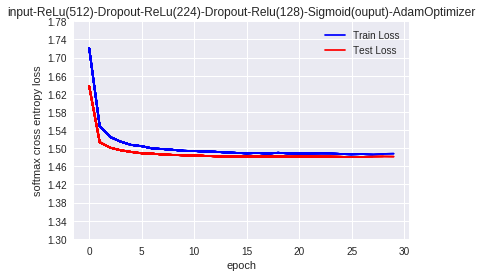

In [13]:
# Building Our Model

training_epochs = 30
learning_rate = 0.001
batch_size = 100
display_step = 1

y_hat = forward_pass(x,weights,biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_hat, labels = y)) # Cost function defined as this is a multiclass problem

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) # Using Adam Optimizer for better result

with tf.Session() as sess: # Create a tensorflow session
  tf.global_variables_initializer().run()
  
  fig,ax = plt.subplots(1,1)
  ax.set_xlabel("epoch")
  ax.set_ylabel("softmax cross entropy loss")
  
  xs_2,ytrs_2,ytes_2 = [],[],[]
  
  for epoch in range(training_epochs):
    
    train_avg_cost = 0
    test_avg_cost = 0
    
    total_num_batches = int(math.floor(mnist.train.num_examples/batch_size))
    
    for i in range(total_num_batches):
      
      batch_X,batch_Y = mnist.train.next_batch(batch_size)
      
      _,c,w = sess.run([optimizer,cost,weights],feed_dict={x:batch_X,y:batch_Y,keep_prob: 0.5})
      train_avg_cost += c / total_num_batches
      
      c = sess.run(cost,feed_dict={x:mnist.test.images,y:mnist.test.labels,keep_prob: 1.0})
      test_avg_cost += c / total_num_batches
      
    xs_2.append(epoch)
    ytrs_2.append(train_avg_cost)
    ytes_2.append(test_avg_cost)
    
    dynamic_plot(xs_2,ytrs_2,ytes_2,ax,np.arange(1.3,1.8,step=0.04),"input-ReLu(512)-Dropout-ReLu(224)-Dropout-Relu(128)-Sigmoid(ouput)-AdamOptimizer")
    
    if epoch%display_step == 0:
      print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
      
  
  dynamic_plot(xs_2,ytrs_2,ytes_2,ax,np.arange(1.3,1.8,step=0.04),"input-ReLu(512)-Dropout-ReLu(224)-Dropout-Relu(128)-Sigmoid(ouput)-AdamOptimizer")
  correct_prediction = tf.equal(tf.argmax(y_hat,1), tf.argmax(y,1))
  accuracy_2 = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  model_2_accuracy = accuracy_2.eval({x: mnist.test.images, y: mnist.test.labels,keep_prob: 1.0})
  print("Accuracy:", model_2_accuracy)

# Model 3: Architecture 5 Hidden Layes with  Batch Normalization

In [0]:
n_x = 784 # number of input features
n_1 = 1024 # number of hidden units in Layer 1
n_2 = 512 # number of hidden units in Layer 2
n_3 = 224 # number of hidden units in Layer 3
n_4 = 128 # number of hidden units in Layer 4
n_5 = 64 # number of hidden units in Layer 3
n_y = 10 # number of hidden units in Output Layer as we have 10 class labels to predict

In [0]:
# Create Placeholder for both x and y

x = tf.placeholder(tf.float32,[None,784],name="x")
y = tf.placeholder(tf.float32,[None,10],name="y")

In [0]:
# Parameters Initialization
# Create dictionary for convinience

# We are using Relu activation for our hidden layers and in the output layer use sigmoid activation function

weights = {
    "h1":tf.Variable(tf.random_normal([n_x,n_1],stddev=0.0504, mean=0)),
    "h2":tf.Variable(tf.random_normal([n_1,n_2],stddev=0.0441, mean=0)),
    "h3":tf.Variable(tf.random_normal([n_2,n_3],stddev=0.0624, mean=0)),
    "h4":tf.Variable(tf.random_normal([n_3,n_4],stddev=0.0942,mean=0)),
    "h5":tf.Variable(tf.random_normal([n_4,n_5],stddev=0.1234,mean=0)),
    "o":tf.Variable(tf.random_normal([n_5,n_y],stddev=0.1754, mean=0))
}

biases = {
    "b1":tf.Variable(tf.random_normal([n_1])),
    "b2":tf.Variable(tf.random_normal([n_2])),
    "b3":tf.Variable(tf.random_normal([n_3])),
    "b4":tf.Variable(tf.random_normal([n_4])),
    "b5":tf.Variable(tf.random_normal([n_5])),
    "o":tf.Variable(tf.random_normal([n_y]))
}

In [0]:
epsilon = 1e-3
def forward_pass(x,weights,biases):
  
  layer_1 = tf.add(tf.matmul(x,weights["h1"]),biases["b1"])
  layer_1 = tf.nn.relu(layer_1)
  
  
  layer_2 = tf.add(tf.matmul(layer_1,weights["h2"]),biases["b2"])
  layer_2 = tf.nn.relu(layer_2) 
  
  
  
  layer_3 = tf.add(tf.matmul(layer_2,weights["h3"]),biases["b3"])
  batch_mean_3, batch_var_3 = tf.nn.moments(layer_3, [0])
  scale_3 = tf.Variable(tf.ones([n_3]))
  beta_3 = tf.Variable(tf.zeros([n_3]))
  layer_3 = tf.nn.batch_normalization(layer_3, batch_mean_3, batch_var_3, beta_3, scale_3, epsilon)
  layer_3 = tf.nn.relu(layer_3)
  
  layer_4 = tf.add(tf.matmul(layer_3,weights["h4"]),biases["b4"])
  batch_mean_4, batch_var_4 = tf.nn.moments(layer_4, [0])
  scale_4 = tf.Variable(tf.ones([n_4]))
  beta_4 = tf.Variable(tf.zeros([n_4]))
  layer_4 = tf.nn.batch_normalization(layer_4, batch_mean_4, batch_var_4, beta_4, scale_4, epsilon)
  layer_4 = tf.nn.relu(layer_4)
  
  layer_5 = tf.add(tf.matmul(layer_4,weights["h5"]),biases["b5"])
  batch_mean_5, batch_var_5 = tf.nn.moments(layer_5, [0])
  scale_5 = tf.Variable(tf.ones([n_5]))
  beta_5 = tf.Variable(tf.zeros([n_5]))
  layer_5 = tf.nn.batch_normalization(layer_5, batch_mean_5, batch_var_5, beta_5, scale_5, epsilon)
  layer_5 = tf.nn.relu(layer_5)
  
  
  
  
                   
  
  output_layer = tf.add(tf.matmul(layer_5,weights["o"]),biases["o"])
  output_layer = tf.nn.sigmoid(output_layer)
  
  return output_layer

Epoch: 0001 train cost=1.573766130 test cost=1.565352927
Epoch: 0002 train cost=1.490614174 test cost=1.489952984
Epoch: 0003 train cost=1.480966786 test cost=1.483716641
Epoch: 0004 train cost=1.476190389 test cost=1.480444247
Epoch: 0005 train cost=1.473249882 test cost=1.478735987
Epoch: 0006 train cost=1.471727725 test cost=1.478847177
Epoch: 0007 train cost=1.470312473 test cost=1.477913625
Epoch: 0008 train cost=1.469204075 test cost=1.476798229
Epoch: 0009 train cost=1.467277300 test cost=1.475845903
Epoch: 0010 train cost=1.467894512 test cost=1.476258943
Epoch: 0011 train cost=1.467127519 test cost=1.476819377
Epoch: 0012 train cost=1.467030718 test cost=1.477250366
Epoch: 0013 train cost=1.466181863 test cost=1.476315040
Epoch: 0014 train cost=1.466234212 test cost=1.475663151
Epoch: 0015 train cost=1.465565470 test cost=1.475495653
Epoch: 0016 train cost=1.465478073 test cost=1.475567076
Epoch: 0017 train cost=1.465148783 test cost=1.476277859
Epoch: 0018 train cost=1.465240

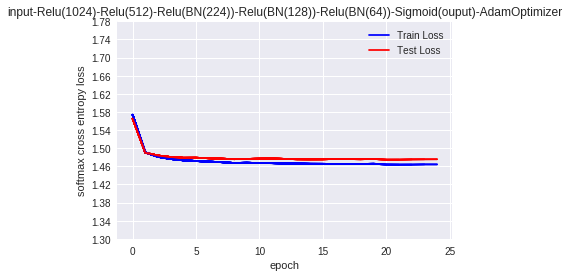

In [18]:
# Building Our Model

training_epochs = 25
learning_rate = 0.001
batch_size = 128
display_step = 1

y_hat = forward_pass(x,weights,biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_hat, labels = y)) # Cost function defined as this is a multiclass problem

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) # Using Adam Optimizer for better result

with tf.Session() as sess: # Create a tensorflow session
  tf.global_variables_initializer().run()
  
  fig,ax = plt.subplots(1,1)
  ax.set_xlabel("epoch")
  ax.set_ylabel("softmax cross entropy loss")
  
  xs_3,ytrs_3,ytes_3 = [],[],[]
  
  for epoch in range(training_epochs):
    
    train_avg_cost = 0
    test_avg_cost = 0
    
    total_num_batches = int(math.floor(mnist.train.num_examples/batch_size))
    
    for i in range(total_num_batches):
      
      batch_X,batch_Y = mnist.train.next_batch(batch_size)
      
      _,c,w = sess.run([optimizer,cost,weights],feed_dict={x:batch_X,y:batch_Y})
      train_avg_cost += c / total_num_batches
      
      c = sess.run(cost,feed_dict={x:mnist.test.images,y:mnist.test.labels})
      test_avg_cost += c / total_num_batches
      
    xs_3.append(epoch)
    ytrs_3.append(train_avg_cost)
    ytes_3.append(test_avg_cost)
    
    dynamic_plot(xs_3,ytrs_3,ytes_3,ax,np.arange(1.3,1.8,step=0.04),"input-Relu(1024)-Relu(512)-Relu(BN(224))-Relu(BN(128))-Relu(BN(64))-Sigmoid(ouput)-AdamOptimizer")
    
    if epoch%display_step == 0:
      print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
      
  
  dynamic_plot(xs_3,ytrs_3,ytes_3,ax,np.arange(1.3,1.8,step=0.04),"input-Relu(1024)-Relu(512)-Relu(BN(224))-Relu(BN(128))-Relu(BN(64))-Sigmoid(ouput)-AdamOptimizer")
  correct_prediction = tf.equal(tf.argmax(y_hat,1), tf.argmax(y,1))
  accuracy_3 = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  model_3_accuracy = accuracy_3.eval({x: mnist.test.images, y: mnist.test.labels})
  print("Accuracy:", model_3_accuracy)

# Performance Comparison of Models Using Pretty Table

In [19]:
# Creating table using PrettyTable library
from prettytable import PrettyTable

# Names of models
names = ['Architecture 2 Hidden Layes without Dropout and Batch Normalization','Architecture 3 Hidden Layes with  Dropout',"Architecture 5 Hidden Layes with  Batch Normalization"]

# Model Accuracy
model_acc = [model_1_accuracy,model_2_accuracy,model_3_accuracy]


numbering = [1,2,3]

# Initializing prettytable
ptable = PrettyTable()

# Adding columns
ptable.add_column("S.NO.",numbering)
ptable.add_column("MODEL",names)
ptable.add_column("Model Accuracy",model_acc)

# Printing the Table
print(ptable)

+-------+---------------------------------------------------------------------+----------------+
| S.NO. |                                MODEL                                | Model Accuracy |
+-------+---------------------------------------------------------------------+----------------+
|   1   | Architecture 2 Hidden Layes without Dropout and Batch Normalization |     0.9775     |
|   2   |              Architecture 3 Hidden Layes with  Dropout              |     0.9753     |
|   3   |        Architecture 5 Hidden Layes with  Batch Normalization        |     0.9823     |
+-------+---------------------------------------------------------------------+----------------+
